### 1. Data loading

In [16]:
set.seed(6718)

In [17]:
dataset = read.csv("C:/Users/achra/Desktop/Etudiants/Maelys/data.csv", header=T)
head(dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [18]:
# Combien de lignes dans le dataset ?
print(paste("Le nombre de lignes est", nrow(dataset)))

# Combien de colonnes ?
print(paste("Le nombre de colonnes est", length(dataset)))

[1] "Le nombre de lignes est 891"
[1] "Le nombre de colonnes est 12"


In [19]:
# Bonne pratique : Toujours mélanger les données, sur cet échantillon ils sont ordonés par PassengerId
shuffle_index <- sample(1:nrow(dataset)) # Genere une liste aléatoire d'indexes de 1 à 891.
head(shuffle_index)

[1] 175 145 677 767 442 401

In [20]:
dataset <- dataset[shuffle_index, ] # Réorganiser les index à travers sample
head(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
175,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
145,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,,S
677,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,,S
767,767,0,1,"Brewe, Dr. Arthur Jackson",male,NA,0,0,112379,39.6000,,C
442,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,,S
401,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,,S


### 2. Clean the dataset

The structure of the data shows some variables have NA's. Data clean up to be done as follows :

- Drop variables cabin, name and ticket
- Create factor variables for pclass and survived
- Drop the NA 

Types de NA:
    
    Missing at random
    Missing not at random

In [21]:
library(dplyr)
# Drop variables
clean_dataset = subset(dataset, select = -c(Cabin, Name, Ticket))

In [22]:
# Colonnes du clean_dataset
names(clean_dataset)

[1] "PassengerId" "Survived"    "Pclass"      "Sex"         "Age"        
[6] "SibSp"       "Parch"       "Fare"        "Embarked"

In [23]:
clean_dataset <- clean_dataset %>% mutate(Survived = factor(Survived, levels = c(0, 1), labels = c('No', 'Yes')),
                                          Pclass = factor(Pclass, levels = c(1, 2, 3),
                                                          labels = c('Upper', 'Middle', 'Lower'))) %>%
na.omit()
# accéde au data, applique mutate pour mettre en factor survived et la stocker en elle même avec labels

In [24]:
tail(clean_dataset)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,353,No,Lower,male,15,1,1,7.2292,C
886,422,No,Lower,male,21,0,0,7.7333,Q
887,586,Yes,Upper,female,18,0,2,79.6500,S
888,217,Yes,Lower,female,27,0,0,7.9250,S
889,862,No,Middle,male,21,1,0,11.5000,S
891,547,Yes,Middle,female,19,1,0,26.0000,S


In [25]:
glimpse(clean_dataset) # Rows/Cols, data types

Rows: 714
Columns: 9
$ PassengerId <int> 175, 145, 677, 442, 401, 423, 783, 805, 635, 766, 435, ...
$ Survived    <fct> No, No, No, No, Yes, No, No, Yes, No, Yes, No, Yes, Yes...
$ Pclass      <fct> Upper, Middle, Lower, Lower, Lower, Lower, Upper, Lower...
$ Sex         <fct> male, male, male, male, male, male, male, male, female,...
$ Age         <dbl> 56.0, 18.0, 24.5, 20.0, 39.0, 29.0, 29.0, 27.0, 9.0, 51...
$ SibSp       <int> 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0...
$ Fare        <dbl> 30.6958, 11.5000, 8.0500, 9.5000, 7.9250, 7.8750, 30.00...
$ Embarked    <fct> C, S, S, S, S, S, S, S, S, S, S, C, C, S, C, C, S, S, S...


### 3. Create train/test set

In [26]:
sample <- sample(c(TRUE, FALSE), nrow(clean_dataset), replace = T, prob = c(0.6,0.4))

In [27]:
train <- clean_dataset[sample, ]
test <- clean_dataset[!sample, ]

In [13]:
print(paste("Le nombre de lignes dans l'échantillon d'apprentissage est", nrow(train), "et le nombre de colonnes est", length(train)))
print(paste("Le nombre de lignes dans l'échantillon de test est", nrow(test), "et le nombre de colonnes est", length(test)))
# dim(train)

[1] "Le nombre de lignes dans l'échantillon d'apprentissage est 427 et le nombre de colonnes est 9"
[1] "Le nombre de lignes dans l'échantillon de test est 287 et le nombre de colonnes est 9"


In [31]:
# La distribution des données
prop.table(table(train$Survived))


       No       Yes 
0.5644028 0.4355972 

In [32]:
#install.packages("rpart.plot")

### 4. Model

In [33]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

In [34]:
fit <- rpart(Survived~., data = train, method = 'class')

rpart(): Function to fit the model. The arguments are:

    Survived ~.: Formula of the Decision Trees
    data = train: Dataset
    method = 'class': Fit a binary model

rpart.plot(fit): Plot the tree.

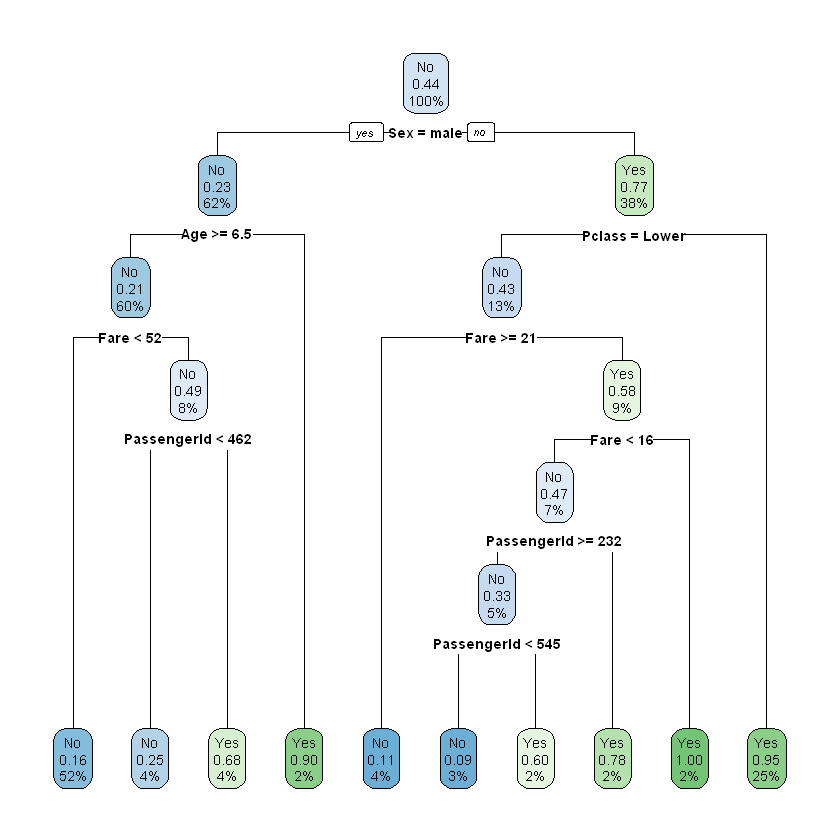

In [36]:
rpart.plot(fit) # extra = 101

### 5. Prediction

In [19]:
predict_unseen <- predict(fit, test, type = 'class')

In [20]:
table_mat <- table(test$Survived, predict_unseen)
table_mat

     predict_unseen
       No Yes
  No  152  31
  Yes  28  76

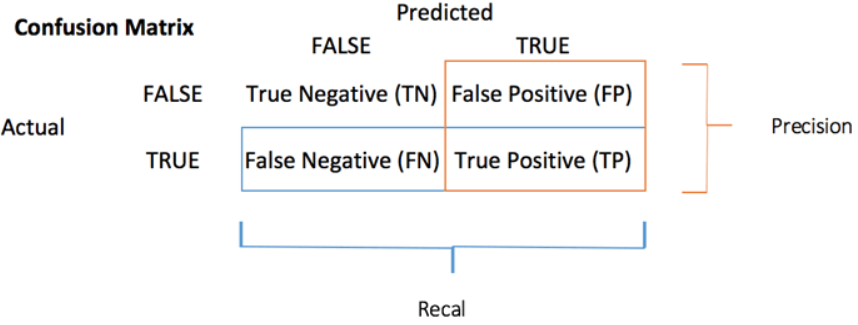
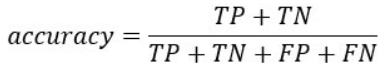

In [21]:
# sum(diag(table_mat)): Sum of the diagonal ; sum(table_mat): Sum of the matrix.
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

In [22]:
print(paste('Accuracy for test', accuracy_Test))

[1] "Accuracy for test 0.794425087108014"


### 6. Hyper-parameters tunning

Steps
    
    Construct function to return accuracy
    minsplit: Set the minimum number of observations in the node before the algorithm perform a split
    minbucket: Set the minimum number of observations in the final note i.e. the leaf 

In [23]:
accuracy_tune <- function(fit) {
    predict_unseen <- predict(fit, test, type = 'class')
    table_mat <- table(test$Survived, predict_unseen)
    accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
    accuracy_Test
}

In [24]:
control <- rpart.control(minsplit = 5,
    minbucket = 5,
    maxdepth = 3)
tune_fit <- rpart(Survived~., data = train, method = 'class', control = control)
accuracy_tune(tune_fit)

[1] 0.8083624

In [25]:
ls(environment())

[1] "accuracy_Test"  "accuracy_tune"  "clean_dataset"  "control"       
 [5] "dataset"        "fit"            "predict_unseen" "sample"        
 [9] "shuffle_index"  "table_mat"      "test"           "train"         
[13] "tune_fit"